In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/NEW YORK samples.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,26,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
PENNSYLVANIA_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/PENNSYLVANIA samples.zip').open(name='result.csv'))


In [4]:
ohio_samples = pd.concat([PENNSYLVANIA_samples, ohio_samples])

In [5]:
stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/PENNSYLVANIA stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ohio_stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/NEW YORK stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,8,10,14,18,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
stations = pd.concat([stations, ohio_stations])

In [8]:
location = (42.530984, -78.995377)

In [13]:
r_stations = stations[(stations.LatitudeMeasure>location[0]-2) & (stations.LatitudeMeasure<location[0]+2) &
                     (stations.LongitudeMeasure>location[1]-2) & (stations.LongitudeMeasure<location[1]+2)]

In [14]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(29672, 63)

In [15]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [58]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=9.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21NYDECA_WQX-01041302B", False],
["USGS-04213500", True],
["USGS-04213470", False],
["USGS-04213453", False],
["USGS-04213426", False],
]



for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in []:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0235,st_df.LongitudeMeasure.values[0]-0.1026], # 10 km
#         location=[st_df.LatitudeMeasure.values[0]+0.0135,st_df.LongitudeMeasure.values[0]-0.0526], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026], # 2km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m





# 21NYDECA_WQX-01041302B 
# USGS-04213500 
# USGS-04213470 
# USGS-04213453 
# USGS-04213426 


21NYDECA_WQX-01041302B
USGS-04213500
USGS-04213470
USGS-04213453
USGS-04213426


In [22]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations = [
# "21OHIO_WQX-200572",
# "21OHIO_WQX-502520",
# "21OHIO_WQX-G02S14",
# "USGS-04212100",
# "USGS-04211820",
# "21OHIO_WQX-G02K52",
# "21OHIO_WQX-G02K54",
# "21OHIO_WQX-300187",
# "21OHIO_WQX-G01K08",
# "21OHIO_WQX-G01K07"]

In [23]:
WQP_name = "Phosphorus"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(288, 63)

In [24]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Maumee_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [25]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [26]:
len(selected_stations)

5

In [27]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l as P', nan, 'mg/l', 'mg/kg'], dtype=object)

In [2]:
river='Cattaraugus_R'

In [32]:
sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = sp["ResultMeasureValue"]/1000

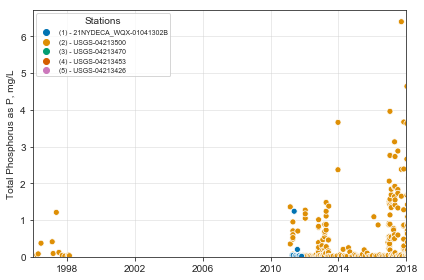

In [150]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc=2)

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [151]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
MonitoringLocationIdentifier &        &       &       &       &       &       &       &       \\
\midrule
21NYDECA\_WQX-01041302B       &   11.0 &  0.15 &  0.37 &  0.01 &  0.02 &  0.03 &  0.04 &  1.24 \\
USGS-04213500                &  247.0 &  0.67 &  0.95 &  0.00 &  0.03 &  0.23 &  0.98 &  6.40 \\
USGS-04213470                &    5.0 &  0.10 &  0.07 &  0.02 &  0.04 &  0.09 &  0.16 &  0.16 \\
USGS-04213453                &    4.0 &  0.06 &  0.06 &  0.01 &  0.03 &  0.05 &  0.09 &  0.15 \\
USGS-04213426                &    4.0 &  0.06 &  0.05 &  0.01 &  0.02 &  0.05 &  0.08 &  0.12 \\
\bottomrule
\end{tabular}



In [39]:
selected_stations

['21NYDECA_WQX-01041302B',
 'USGS-04213500',
 'USGS-04213470',
 'USGS-04213453',
 'USGS-04213426']

In [129]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(264, 63)

In [130]:
master_st_df[(master_st_df.ActivityStartDate>datetime.datetime(2003,1,1)) & (master_st_df.ActivityStartDate<datetime.datetime(2016,1,1))].groupby('ActivityStartDate').mean().shape

(81, 6)

In [139]:
master_st_df[master_st_df.ActivityStartDate>datetime.datetime(2003,1,1)][master_st_df.MonitoringLocationIdentifier.isin(master_stations)][[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'One_by_one/Western/US/'+river+'/TP_'+river+'iver_data.csv', index=False)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Discharge

In [43]:
# Finde station here:
# https://www.hydrocloud.org
site = '04213500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [44]:
discharge.columns

Index(['USGS:04213500:00060:00003', 'USGS:04213500:00060:00003_qualifiers'], dtype='object')

In [45]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [46]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [47]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [48]:
# df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Maumee_River_Data.csv')
# df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
# df_Q_heideleberg['Source'] = 'HTLP (NCWQR)'
# df_Q_heideleberg['Discharge, cms'] = 0.028*df_Q_heideleberg['Flow, CFS']


In [49]:
# discharge = discharge.append(df_Q_heideleberg)

In [50]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [51]:
river

'Cattaraugus_R'

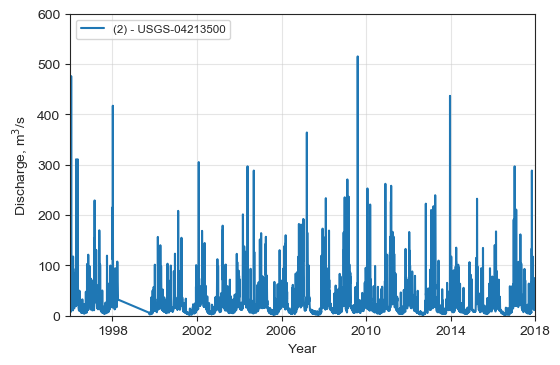

In [152]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(2) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,600)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [56]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [3]:
river

'Cattaraugus_R'

In [4]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


In [5]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


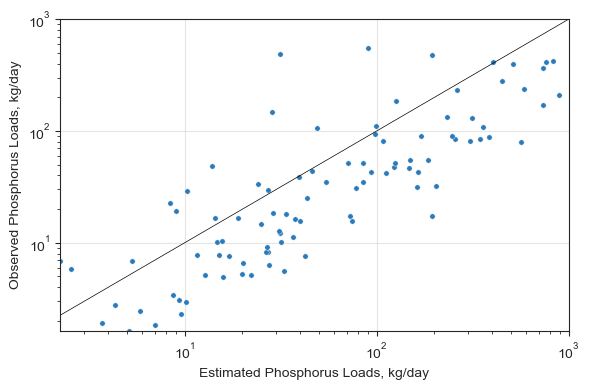

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(0,1000)
plt.ylim(0,1000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [7]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


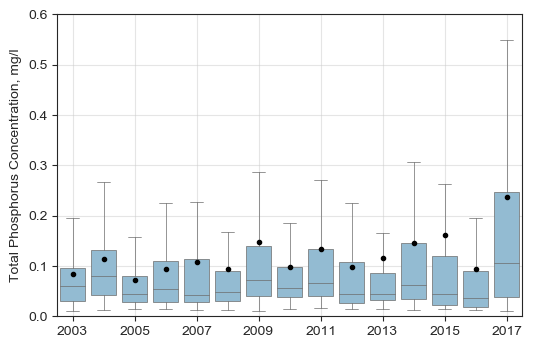

In [10]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(5.5, 20.5)
plt.xticks([int(x) for x in np.linspace(6,20,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,.6)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')




In [11]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




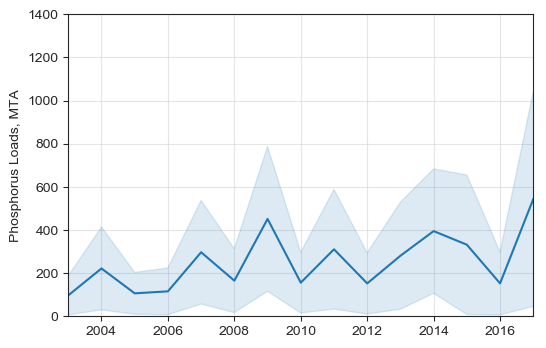

In [12]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'], EGRET_Daily_an['FluxYearMTA'], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'],
                 EGRET_Daily_an['FluxYearMTA']-EGRET_Daily_an['Fx_SE'],
                 EGRET_Daily_an['FluxYearMTA']+EGRET_Daily_an['Fx_SE'], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,1400)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PFlux.pdf')


In [110]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2019) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrrr}
\toprule
     6  &      7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 &  2018.0 \\
   80.0 &   175.5 &    94.6 &   103.6 &   274.1 &   155.2 &   424.8 &   147.2 &   294.4 &   149.1 &   271.5 &   396.5 &   328.3 &   154.0 &   555.6 &   796.9 \\
   78.4 &   166.5 &    89.7 &    99.5 &   235.2 &   143.8 &   357.0 &   139.0 &   274.5 &   141.1 &   251.1 &   299.6 &   330.3 &   149.5 &   520.2 &   601.0 \\
\bottomrule
\end{tabular}



In [111]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,183.119889,1703.488807,1.856715,9.732140,20.396036,33.961726,27587.121479
1997,365.0,67.416349,213.259299,2.068665,12.227918,19.826721,41.109110,2855.179612
1998,182.0,236.120570,1753.172342,2.963729,11.850770,22.618499,48.612108,22732.783768
2000,366.0,52.154335,128.289137,1.768501,6.212031,14.888469,36.503252,1306.755280
2001,365.0,48.671279,223.247919,1.132500,6.115166,10.060157,23.395584,3551.144539
2002,365.0,88.152662,604.693879,1.793841,7.844750,16.894908,35.900113,11048.066183
2003,365.0,79.972220,234.490224,2.252670,10.299107,18.208451,44.629473,2157.988825
2004,366.0,175.467355,732.923364,3.923977,17.412184,33.088456,89.758988,9615.665236
2005,365.0,94.572163,322.885919,0.920051,6.770788,14.437313,42.667955,3207.504359
